# Lecture 11 - Neural Network Applications



# Neural Network Success: Why Now?

- New Theory?
- More Data?
- New Hardware?
- New Software?


# Neural Network Success: What was new?


- Technological developments (Gaming and GPUs)
- Open Source Programming Libraries
- Open knowledge (conferences, arxiv, online tutorials/courses)
- More open data
    
Building and Training Neural Nets was easy and fast

Students took existing research and experimented

# Deep Learning Frameworks

- [Tensorflow](https://www.tensorflow.org/)
- [Keras](https://keras.io)
- [PyTorch](https://pytorch.org)
- [Caffee](http://caffe.berkeleyvision.org/)
- [Theano](http://www.deeplearning.net/software/theano/)
- [MxNet](https://mxnet.apache.org/)
- [CNTK](https://github.com/Microsoft/CNTK)



# [Quantitative comparison on Medium](https://towardsdatascience.com/deep-learning-framework-power-scores-2018-23607ddf297a)



![Overall Comparison](figures/dl_frameworks_overall.png)






![Joblistings](figures/dl_frameworks_joblistings.png)

![KDNuggets usage](figures/dl_frameworks_kdnuggets_usage.png)

![Google Searches](figures/dl_frameworks_google_searches.png)

![github](figures/dl_frameworks_github.png)

![arxiv](figures/dl_frameworks_arxiv_articles.png)

[But this changed recently](https://towardsdatascience.com/which-deep-learning-framework-is-growing-fastest-3f77f14aa318)
![](figures/dl_frameworks_google_searches_growth.png)


According to a [comprehensive stackoverflow survey](https://insights.stackoverflow.com/survey/2018/#technology) **Tensorflow** is the most *loved* library.

# Keras

- high-level neural networks API in Python
- Backends:
  - TensorFlow
  - CNTK
  - Theano
  - [mxnet](https://github.com/awslabs/keras-apache-mxnet) (inofficially)
  

*Being able to go from idea to result with the least possible delay is key to doing good research.*

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility)
- Supports convolutional and recurrent networks and combinations of the two
- Runs seamlessly on CPU and GPU.

## A Simple Example: The ``Sequential`` Module

In Keras, ``Sequential`` models are a linear stack of layers

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

## A Simple Example: The ``Sequential`` Module

In Keras, ``Sequential`` models are a linear stack of layers

In [10]:
# an empty model
model = Sequential()
num_hidden = 2000
num_classes = 10
model = Sequential([
    Dense(num_hidden, activation='relu', input_dim=100),
    Dense(num_classes, activation='softmax'),
])

Instructions for updating:
Colocations handled automatically by placer.


Or use the ``add`` function to build up a network:

In [11]:
# an empty model
model = Sequential()

# a one layer neural network
model.add(Dense(num_hidden, activation='relu', input_dim=100))
model.add(Dense(num_classes, activation='softmax'))

## Compilation

The learning process is configured via the ``compile``, which receives:

- An [optimizer](https://keras.io/optimizers)

- A [loss function](https://keras.io/losses)

- A list of metrics (e.g. 'accuracy')

In [12]:
# compile the network
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training on MNIST data

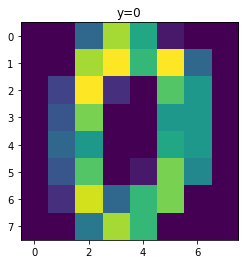

In [13]:
import numpy as np
import keras
import sklearn.datasets
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline

X, Y = sklearn.datasets.load_digits(return_X_y=True)
imsize = int(np.sqrt(X.shape[-1])) 
plt.imshow(X[0,:].reshape(imsize,imsize)); 
plt.title(f"y={Y[0]}");
plt.grid(False);

In [14]:
X, Y = sklearn.datasets.load_digits(return_X_y=True) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
# Convert labels to categorical one-hot encoding
Y_train_one_hot = keras.utils.to_categorical(Y_train, num_classes=Y.max() + 1)
Y_test_one_hot = keras.utils.to_categorical(Y_test, num_classes=Y.max() + 1)
# an empty model
model = Sequential()
num_hidden = 10

# a one layer neural network 
model.add(Dense(num_hidden, activation='relu')) 
model.add(Dense(num_classes, activation='softmax')) 
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(X_train, Y_train_one_hot, epochs=100, batch_size=32, validation_data=(X_test, Y_test_one_hot))

Instructions for updating:
Use tf.cast instead.
Train on 1347 samples, validate on 450 samples
Epoch 1/100
1347/1347 [==============================] - 0s 203us/step - loss: 5.0776 - acc: 0.1604 - val_loss: 3.3658 - val_acc: 0.1911
Epoch 2/100
1347/1347 [==============================] - 0s 29us/step - loss: 2.6974 - acc: 0.2056 - val_loss: 2.2346 - val_acc: 0.2267
Epoch 3/100
1347/1347 [==============================] - 0s 31us/step - loss: 2.1283 - acc: 0.2539 - val_loss: 1.9948 - val_acc: 0.2867
Epoch 4/100
1347/1347 [==============================] - 0s 28us/step - loss: 1.9466 - acc: 0.3059 - val_loss: 1.8462 - val_acc: 0.3356
Epoch 5/100
1347/1347 [==============================] - 0s 26us/step - loss: 1.8019 - acc: 0.3504 - val_loss: 1.7187 - val_acc: 0.3800
Epoch 6/100
1347/1347 [==============================] - 0s 24us/step - loss: 1.6612 - acc: 0.3875 - val_loss: 1.5802 - val_acc: 0.4067
Epoch 7/100
1347/1347 [==============================] - 0s 26us/step - loss: 1.5276 - a

1347/1347 [==============================] - 0s 27us/step - loss: 0.1271 - acc: 0.9673 - val_loss: 0.3094 - val_acc: 0.9333
Epoch 59/100
1347/1347 [==============================] - 0s 25us/step - loss: 0.1251 - acc: 0.9644 - val_loss: 0.3622 - val_acc: 0.9000
Epoch 60/100
1347/1347 [==============================] - 0s 23us/step - loss: 0.1241 - acc: 0.9666 - val_loss: 0.2962 - val_acc: 0.9289
Epoch 61/100
1347/1347 [==============================] - 0s 23us/step - loss: 0.1198 - acc: 0.9636 - val_loss: 0.3139 - val_acc: 0.9333
Epoch 62/100
1347/1347 [==============================] - 0s 22us/step - loss: 0.1183 - acc: 0.9703 - val_loss: 0.3106 - val_acc: 0.9311
Epoch 63/100
1347/1347 [==============================] - 0s 23us/step - loss: 0.1150 - acc: 0.9659 - val_loss: 0.3300 - val_acc: 0.9222
Epoch 64/100
1347/1347 [==============================] - 0s 23us/step - loss: 0.1090 - acc: 0.9718 - val_loss: 0.2910 - val_acc: 0.9333
Epoch 65/100
1347/1347 [==============================

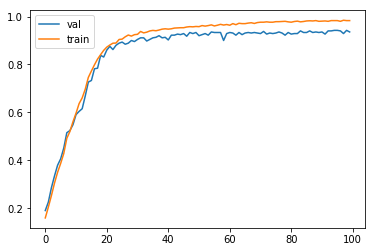

In [15]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.legend(['val','train'])

# Classifying Images with Pretrained Convolutional Networks

Convolutional Networks are State-of-the-art in computer vision. 

You can use networks pretrained on the [imagenet](http://www.image-net.org/) dataset to predict classes contained in that dataset.

In [3]:
#!pip install image
from keras.preprocessing import image
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import numpy as np

# the pretrained model, trained on imagenet
model = MobileNetV2(weights='imagenet')

def predict_with_imagenet_model(img_path, model=model):

    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    return decode_predictions(preds, top=3)[0]


![](figures/cat.jpg)

In [5]:
predict_with_imagenet_model('figures/cat.jpg')

[('n02497673', 'Madagascar_cat', 0.20027561),
 ('n01877812', 'wallaby', 0.14116618),
 ('n02124075', 'Egyptian_cat', 0.13832565)]

![](figures/cat_butterfly.jpg)

In [8]:
predict_with_imagenet_model('figures/cat_butterfly.jpg')

[('n02441942', 'weasel', 0.043041687),
 ('n02120079', 'Arctic_fox', 0.037492126),
 ('n02497673', 'Madagascar_cat', 0.02606236)]